In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"D:\Genai_Projects\ai_ecom_agent\Data\churn.csv")

In [4]:
df.head()

,order_id,customer_id,product_id,category,price,discount_percentage,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,date,month,year,churn
0,O100000,C17270,P234890,Home,164.08,15,1,Credit Card,4,West,No,139.47,7.88,31.17,60,Female,23,12,2023,0
1,O100001,C17603,P228204,Grocery,24.73,0,1,Credit Card,6,South,No,24.73,4.60,-2.62,37,Male,3,4,2025,0
2,O100002,C10860,P213892,Electronics,175.58,5,1,Credit Card,4,North,No,166.80,6.58,13.44,34,Male,8,10,2024,1
3,O100003,C15390,P208689,Electronics,63.67,0,1,UPI,6,South,No,63.67,5.50,2.14,21,Female,14,9,2024,0
4,O100004,C15226,P228063,Home,16.33,15,1,COD,6,East,No,13.88,2.74,1.15,39,Male,21,12,2024,0


In [5]:
df.columns

Index(['order_id', 'customer_id', 'product_id', 'category', 'price',
       'discount_percentage', 'quantity', 'payment_method',
       'delivery_time_days', 'region', 'returned', 'total_amount',
       'shipping_cost', 'profit_margin', 'customer_age', 'customer_gender',
       'date', 'month', 'year', 'churn'],
      dtype='object')

In [6]:
df.shape

(34500, 20)

In [7]:
df[df.duplicated()].sum()

order_id                 0
customer_id              0
product_id               0
category                 0
price                  0.0
discount_percentage      0
quantity                 0
payment_method           0
delivery_time_days       0
region                   0
returned                 0
total_amount           0.0
shipping_cost          0.0
profit_margin          0.0
customer_age             0
customer_gender          0
date                     0
month                    0
year                     0
churn                    0
dtype: object

In [8]:
df.isnull().sum()

order_id               0
customer_id            0
product_id             0
category               0
price                  0
discount_percentage    0
quantity               0
payment_method         0
delivery_time_days     0
region                 0
returned               0
total_amount           0
shipping_cost          0
profit_margin          0
customer_age           0
customer_gender        0
date                   0
month                  0
year                   0
churn                  0
dtype: int64

In [9]:
df.tail()

,order_id,customer_id,product_id,category,price,discount_percentage,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,date,month,year,churn
34495,O134495,C13553,P231412,Fashion,10.44,20,1,Debit Card,3,North,No,8.35,3.04,-0.12,23,Female,13,8,2025,0
34496,O134496,C11349,P218266,Beauty,4.79,10,5,Debit Card,6,South,Yes,21.56,3.37,6.33,61,Female,4,12,2023,1
34497,O134497,C12986,P204345,Electronics,323.64,0,5,Credit Card,6,East,No,1618.20,12.18,182.00,41,Female,1,2,2025,0
34498,O134498,C17196,P217644,Home,23.09,5,1,Credit Card,6,East,No,21.94,5.61,0.53,27,Female,27,3,2024,0
34499,O134499,C13330,P207047,Home,76.84,0,1,Debit Card,6,East,No,76.84,7.57,13.95,19,Male,11,9,2025,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             34500 non-null  object 
 1   customer_id          34500 non-null  object 
 2   product_id           34500 non-null  object 
 3   category             34500 non-null  object 
 4   price                34500 non-null  float64
 5   discount_percentage  34500 non-null  int64  
 6   quantity             34500 non-null  int64  
 7   payment_method       34500 non-null  object 
 8   delivery_time_days   34500 non-null  int64  
 9   region               34500 non-null  object 
 10  returned             34500 non-null  object 
 11  total_amount         34500 non-null  float64
 12  shipping_cost        34500 non-null  float64
 13  profit_margin        34500 non-null  float64
 14  customer_age         34500 non-null  int64  
 15  customer_gender      34500 non-null 

In [98]:
df["order_date"] = pd.to_datetime(df["order_date"])

KeyError: 'order_date'

In [ ]:
df["date"] = df["order_date"].dt.day
df["month"] = df["order_date"].dt.month
df["year"] = df["order_date"].dt.year

KeyError: 'order_date'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            34500 non-null  object        
 1   customer_id         34500 non-null  object        
 2   product_id          34500 non-null  object        
 3   category            34500 non-null  object        
 4   price               34500 non-null  float64       
 5   discount            34500 non-null  float64       
 6   quantity            34500 non-null  int64         
 7   payment_method      34500 non-null  object        
 8   order_date          34500 non-null  datetime64[ns]
 9   delivery_time_days  34500 non-null  int64         
 10  region              34500 non-null  object        
 11  returned            34500 non-null  object        
 12  total_amount        34500 non-null  float64       
 13  shipping_cost       34500 non-null  float64   

In [ ]:
df = df.drop(columns="order_date",axis = 1)

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'product_id', 'category', 'price',
       'discount', 'quantity', 'payment_method', 'delivery_time_days',
       'region', 'returned', 'total_amount', 'shipping_cost', 'profit_margin',
       'customer_age', 'customer_gender', 'date', 'month', 'year'],
      dtype='object')

In [ ]:
df.head()

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,date,month,year
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,4,West,No,139.47,7.88,31.17,60,Female,23,12,2023
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,6,South,No,24.73,4.60,-2.62,37,Male,3,4,2025
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,4,North,No,166.80,6.58,13.44,34,Male,8,10,2024
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,6,South,No,63.67,5.50,2.14,21,Female,14,9,2024
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,6,East,No,13.88,2.74,1.15,39,Male,21,12,2024


count     7903.000000
mean       742.160325
std        827.178631
min          1.240000
25%        215.885000
50%        494.450000
75%        972.460000
max      13885.100000
Name: total_amount, dtype: float64


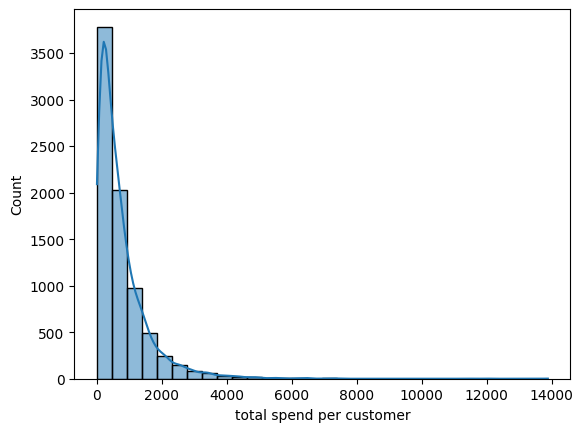

In [ ]:
customer_spend = df.groupby("customer_id")["total_amount"].sum()
sns.histplot(customer_spend ,bins = 30,kde=True)
plt.xlabel("total spend per customer")

print(customer_spend.describe())

In [ ]:
customer_spend

customer_id
C10000     210.58
C10001    3246.02
C10002     216.85
C10003     154.30
C10004     716.99
           ...   
C17995     699.48
C17996     981.94
C17997     787.04
C17998     302.48
C17999    2131.87
Name: total_amount, Length: 7903, dtype: float64

In [ ]:
threshold = 215.885000
customer_spend = customer_spend.apply(lambda x : 0 if x >= threshold else 1)

In [ ]:
df["churn"] = df["customer_id"].map(customer_spend)

In [ ]:
df.head()

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,date,month,year,churn
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,4,West,No,139.47,7.88,31.17,60,Female,23,12,2023,0
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,6,South,No,24.73,4.60,-2.62,37,Male,3,4,2025,0
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,4,North,No,166.80,6.58,13.44,34,Male,8,10,2024,1
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,6,South,No,63.67,5.50,2.14,21,Female,14,9,2024,0
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,6,East,No,13.88,2.74,1.15,39,Male,21,12,2024,0


In [ ]:
df.rename(columns={"discount":"discount_percentage"},inplace=True)

In [ ]:
df.head()

,order_id,customer_id,product_id,category,price,discount_percentage,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,date,month,year,churn
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,4,West,No,139.47,7.88,31.17,60,Female,23,12,2023,0
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,6,South,No,24.73,4.60,-2.62,37,Male,3,4,2025,0
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,4,North,No,166.80,6.58,13.44,34,Male,8,10,2024,1
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,6,South,No,63.67,5.50,2.14,21,Female,14,9,2024,0
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,6,East,No,13.88,2.74,1.15,39,Male,21,12,2024,0


In [ ]:
df["discount_percentage"] = (df["discount_percentage"] * 100).astype(int)


In [ ]:
df.head()

,order_id,customer_id,product_id,category,price,discount_percentage,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,date,month,year,churn
0,O100000,C17270,P234890,Home,164.08,15,1,Credit Card,4,West,No,139.47,7.88,31.17,60,Female,23,12,2023,0
1,O100001,C17603,P228204,Grocery,24.73,0,1,Credit Card,6,South,No,24.73,4.60,-2.62,37,Male,3,4,2025,0
2,O100002,C10860,P213892,Electronics,175.58,5,1,Credit Card,4,North,No,166.80,6.58,13.44,34,Male,8,10,2024,1
3,O100003,C15390,P208689,Electronics,63.67,0,1,UPI,6,South,No,63.67,5.50,2.14,21,Female,14,9,2024,0
4,O100004,C15226,P228063,Home,16.33,15,1,COD,6,East,No,13.88,2.74,1.15,39,Male,21,12,2024,0


In [ ]:
df.to_csv(r"D:\Genai_Projects\ai_ecom_agent\Data\churn.csv", index=False)


###Eda